#  PCA and KNN Classifier

In [2]:
# Importing necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split ,StratifiedKFold, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,accuracy_score,  roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')

### 1. Use any standard data set and perform PCA on the data.

In [3]:
# Loading the Breast Cancer dataset:

breast_cancer = load_breast_cancer()

In [4]:
# Feature names:
print(breast_cancer.feature_names)

# No. of features:
print(len(breast_cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [5]:
# Obtaining the target names
print(breast_cancer.target_names)   # The target column in our dataset is 'diagnosis'. 
# We see that that the target names are 'malignant' and 'benign'. They represent whether the cancer is malignant or benign
# 0 represents 'malignant' and 1 represents 'benign'.

# No. of observations in each class of the target.
print(np.array(np.unique(breast_cancer.target, return_counts=True)))

['malignant' 'benign']
[[  0   1]
 [212 357]]


In [6]:
# Viewing the data:

df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
df['diagnosis'] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
# Get the features and label from the original dataframe:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Scaling the data as PCA is sensitive to scaling:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [220]:
# Fitting a PCA model:

components = None      
# Setting no. of components as None.
# So that the number of components returned will be the same as the number of original features in the dataset.
pca = PCA(n_components = components)

# Perform PCA on the scaled data:
pca.fit(X_scaled)

PCA()

In [221]:
# Printing the explained variances:
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]



The first component explains 44.27% variance in the data, the second component explains 18.97% of the variance, the third component explains 9.39% of the variance and so on 

In [222]:
# Printing the cumulative explained variances:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]



Cumulatively all 30 components explain 100% variance in the data. 


Text(0.5, 1.0, 'Scree Plot')

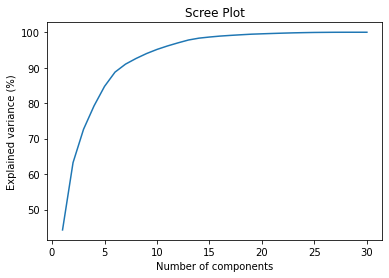

In [223]:
# Scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title('Scree Plot')

From the scree plot and the printed explained variance percentage values, we get that the point of inflexion is 6 i.e six components should be retained. 

These six components explain 88.76% of the variance. 

In [224]:
# Importance of each feature that contributes to each of the components
pca_components = abs(pca.components_)
print(pca_components)

[[2.18902444e-01 1.03724578e-01 2.27537293e-01 2.20994985e-01
  1.42589694e-01 2.39285354e-01 2.58400481e-01 2.60853758e-01
  1.38166959e-01 6.43633464e-02 2.05978776e-01 1.74280281e-02
  2.11325916e-01 2.02869635e-01 1.45314521e-02 1.70393451e-01
  1.53589790e-01 1.83417397e-01 4.24984216e-02 1.02568322e-01
  2.27996634e-01 1.04469325e-01 2.36639681e-01 2.24870533e-01
  1.27952561e-01 2.10095880e-01 2.28767533e-01 2.50885971e-01
  1.22904556e-01 1.31783943e-01]
 [2.33857132e-01 5.97060883e-02 2.15181361e-01 2.31076711e-01
  1.86113023e-01 1.51891610e-01 6.01653628e-02 3.47675005e-02
  1.90348770e-01 3.66575471e-01 1.05552152e-01 8.99796818e-02
  8.94572342e-02 1.52292628e-01 2.04430453e-01 2.32715896e-01
  1.97207283e-01 1.30321560e-01 1.83848000e-01 2.80092027e-01
  2.19866379e-01 4.54672983e-02 1.99878428e-01 2.19351858e-01
  1.72304352e-01 1.43593173e-01 9.79641143e-02 8.25723507e-03
  1.41883349e-01 2.75339469e-01]
 [8.53124284e-03 6.45499033e-02 9.31421972e-03 2.86995259e-02
  1.

The higher the values, the greater is the importance of each feature

In [225]:
# Print out the top 5 features that contributes the most to each of the 6 components:

print('Top 5 most important features in each component:')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 5)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:5]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 5 most important features in each component:
Component 0: ['mean concave points', 'mean concavity', 'worst concave points', 'mean compactness', 'worst perimeter']
Component 1: ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension', 'mean radius', 'compactness error']
Component 2: ['texture error', 'smoothness error', 'symmetry error', 'worst symmetry', 'radius error']
Component 3: ['worst texture', 'mean texture', 'texture error', 'mean smoothness', 'area error']
Component 4: ['mean smoothness', 'concavity error', 'worst smoothness', 'mean symmetry', 'compactness error']
Component 5: ['worst symmetry', 'symmetry error', 'worst smoothness', 'mean symmetry', 'smoothness error']
Component 6: ['worst fractal dimension', 'concave points error', 'area error', 'perimeter error', 'radius error']
Component 7: ['smoothness error', 'texture error', 'mean smoothness', 'mean symmetry', 'worst symmetry']
Component 8: ['concavity error', 'symmetry error', 'concave points 

The top 5 features for each of the six components are given above

In [226]:
# Transform the standardized data of the 30 columns in the dataset to the 6 principal components:

X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(569, 30)
[[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ... -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ...  3.26241827e-02
  -5.68742432e-03 -1.86787626e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ...  4.70258247e-02
   3.14589659e-03  7.50534755e-04]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ... -2.57775589e-03
   6.70621179e-03  3.77041667e-03]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ... -6.80863833e-02
  -8.41632764e-02 -2.37828222e-02]
 [-5.47524330e+00 -6.70636791e-01  1.49044308e+00 ... -9.51587894e-03
  -6.09131090e-02 -1.94755854e-02]]


Cumulative Variances (Percentage):
[44.27202561 63.24320765 72.63637091 79.23850582 84.73427432 88.75879636]
Number of components: 6


Text(0, 0.5, 'Explained variance (%)')

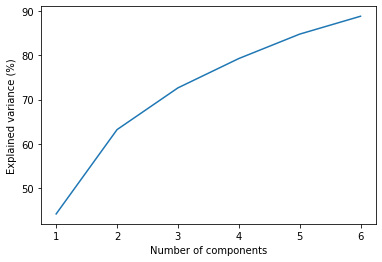

In [227]:
pca = PCA(n_components = 6)
pca.fit(X_scaled)

print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

###  2. Train a KNN classifier on the raw data used in question 1.

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state= 33)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)

Minimum error:- 0.07602339181286555 at K = 5


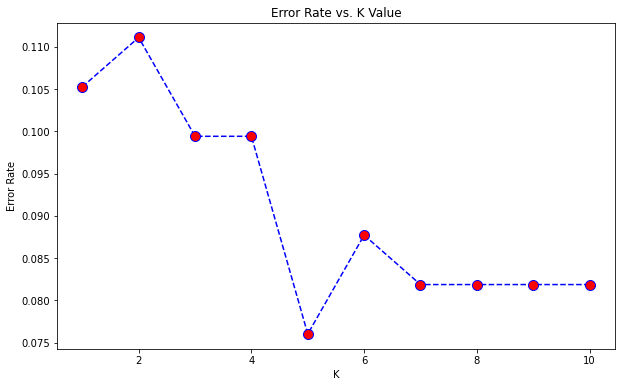

In [231]:
# Finding optimal k value
error_rate = []
for k in range(1,11):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # Fitting the model
    model_knn = knn.fit(X_train,y_train)
    y_hat = model_knn.predict(X_test)
    
    # Test error rate
    test_error = 1 - accuracy_score(y_hat,y_test)
    error_rate.append(test_error)
    
# Plotting the error rates 
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

INTERPRETATION

From the graph, we can notice that at point k = 5, test error rate is less comparing to the other k values.
Thus we consider k = 5 as a optimum value for our model.

In [233]:
knn = KNeighborsClassifier(n_neighbors = 5)
# Fitting the model
model2_knn = knn.fit(X_train,y_train)

# prediction
y_hat_train1 = model2_knn.predict(X_train)
y_hat_test1 = model2_knn.predict(X_test)
    
# Test error rate
train_error1 =1 - accuracy_score(y_hat_train1,y_train)
test_error1 =1 - accuracy_score(y_hat_test1,y_test)

print("Train Error Rate :",train_error1)
print("Test Error Rate :",test_error1)
print("Accuracy Score for Train Data",accuracy_score(y_hat_train1,y_train))
print("Accuracy Score for Test Data",accuracy_score(y_hat_test1,y_test))

print("\n")
print("Classification report: ")
print(classification_report(y_test, y_hat_test1))

print("Confusion matrix: ")
print(confusion_matrix(y_test, y_hat_test1))

print("\n")

print("Accuracy:")
print(f' The accuracy score is: {accuracy_score(y_test, y_hat_test1)}')

Train Error Rate : 0.055276381909547756
Test Error Rate : 0.07602339181286555
Accuracy Score for Train Data 0.9447236180904522
Accuracy Score for Test Data 0.9239766081871345


Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.86      0.90        66
           1       0.92      0.96      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171

Confusion matrix: 
[[ 57   9]
 [  4 101]]


Accuracy:
 The accuracy score is: 0.9239766081871345


The test error of the kNN model is 0.076.

#### Comparision with logistic regression model:

In [10]:
# Selection of model parameters using GridSearchCV
lgr = LogisticRegression()
lgr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, .009, 0.01, .09, 1, 5, 10, 25],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}
grid_search_lgr = GridSearchCV(estimator=lgr,
                               param_grid=lgr_params,
                               cv=cv,
                               verbose=1,
                               scoring='roc_auc',
                               error_score=0)
grid_result_lgr = grid_search_lgr.fit(X_train, y_train)
grid_result_lgr.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'C': 25, 'penalty': 'l1', 'solver': 'liblinear'}

In [235]:
# Model training and scoring

lgr = lgr.set_params(**grid_result_lgr.best_params_)
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)


print("\n")
print("Classification report: ")
print(classification_report(y_test, y_pred_lgr))

print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred_lgr))
print("\n")

print("Accuracy")
print(f'The accuracy score is: {accuracy_score(y_test, y_pred_lgr)}')

print("The test error is " , 1-accuracy_score(y_test, y_pred_lgr))



Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        66
           1       0.96      0.99      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion matrix: 
[[ 62   4]
 [  1 104]]


Accuracy
The accuracy score is: 0.9707602339181286
The test error is  0.0292397660818714


INTERPRETATION:
 
The test error in logistic model is lesser than the test error of the KNN model.
Comparing the accuracy scores and test errors of the KNN model and the logistic regression model, we conclude that the logistic model performs better than the KNN model.

### 3. Observe the change in performance of the classifiers for the transformed data set using PCA.

In [237]:
# Creating a Machine Learning Pipeline:

_sc = StandardScaler()
_pca = PCA(n_components = 6)
_model = KNeighborsClassifier()

# Logistic regression model using transformed data set using PCA:
knn_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [238]:
# Train-test split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state= 33)

# Training the model using the PCA components
knn_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', KNeighborsClassifier())])

In [239]:
# Accuracy 
acc = knn_model.score(X_test,y_test)
print("The accuracy of the KNN model after using transformed data using PCA is:" , round(acc,4))

The accuracy of the logistic regression model after using transformed data using PCA is: 0.9649


INTERPRETATION:

Initialy, when we performed classification using KNN model, we obtained the accuracy score of 0.9239.
After using the transformed data using PCA in the KNN model, we obtained an accuracy of 0.9649.


CONCLUSION:

Hence, we see that PCA has helped in increasing the accuracy of the model and we obtained a better performing model.